# Data 512: Course Project (Part 2 - An Extension Plan)

In this notebook, we aim to acquire relevant datasets that will support our analysis of the impacts of wildfire smoke in Vancouver, WA.

## 1 Import required libraries

In [1]:
# for data manipulation
import pandas as pd
import numpy as np

# for data visualization
import matplotlib.pyplot as plt

# to supress warnings
import warnings
warnings.filterwarnings("ignore")

## 2 Dataset - WA: Respiratory Disease Mortality (IHME)

In [2]:
# load the downloaded dataset
mortality = pd.read_csv("../data/IHME_Respiratory_Disease_Mortality_Washington.csv")
mortality.head()

,measure_id,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx,lower,upper
0,1,Deaths,570,Washington,53,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1980,Rate,73.347522,70.814541,75.823906
1,1,Deaths,570,Washington,53,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1981,Rate,73.412468,70.983364,75.920630
2,1,Deaths,570,Washington,53,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1982,Rate,72.933100,70.534293,75.259102
3,1,Deaths,570,Washington,53,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1983,Rate,73.322175,71.014651,75.555851
4,1,Deaths,570,Washington,53,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1984,Rate,73.172945,70.886086,75.385452


In [3]:
# get the details of Clark County
mortality_clark = mortality[mortality["location_name"] == "Clark County"]
mortality_clark.head()

,measure_id,measure_name,location_id,location_name,FIPS,cause_id,cause_name,sex_id,sex,age_id,age_name,year_id,metric,mx,lower,upper
630,1,Deaths,3563,Clark County,53011,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1980,Rate,74.559587,69.693866,79.623905
631,1,Deaths,3563,Clark County,53011,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1981,Rate,74.855265,70.095372,79.838698
632,1,Deaths,3563,Clark County,53011,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1982,Rate,74.373864,69.668210,79.110574
633,1,Deaths,3563,Clark County,53011,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1983,Rate,73.004129,68.661227,77.685383
634,1,Deaths,3563,Clark County,53011,508,Chronic respiratory diseases,1,Male,27,Age-standardized,1984,Rate,75.848903,71.451555,80.311738


In [4]:
mortality_clark.describe()

,measure_id,location_id,FIPS,cause_id,sex_id,age_id,year_id,mx,lower,upper
count,1050.0,1050.0,1050.0,1050.00000,1050.000000,1050.0,1050.000000,1050.000000,1050.000000,1050.000000
mean,1.0,3563.0,53011.0,512.80000,2.000000,27.0,1997.000000,11.421866,10.569457,12.329644
std,0.0,0.0,0.0,3.43092,0.816886,0.0,10.104318,21.457270,20.332929,22.620581
min,1.0,3563.0,53011.0,508.00000,1.000000,27.0,1980.000000,0.001719,0.000164,0.005368
25%,1.0,3563.0,53011.0,510.00000,1.000000,27.0,1988.000000,0.093619,0.035066,0.153740
50%,1.0,3563.0,53011.0,512.50000,2.000000,27.0,1997.000000,0.584727,0.382116,0.814984
75%,1.0,3563.0,53011.0,515.00000,3.000000,27.0,2006.000000,5.211412,3.479449,7.001900
max,1.0,3563.0,53011.0,520.00000,3.000000,27.0,2014.000000,76.747887,72.484230,81.542869


It looks like we have havrious cause names and sex. Let us check them once.

In [5]:
print("Cause Names:\n", mortality_clark["cause_name"].unique())
print("\nSex:\n", mortality_clark["sex"].unique())

Cause Names:
 ['Chronic respiratory diseases' 'Chronic obstructive pulmonary disease'
 'Pneumoconiosis' 'Silicosis' 'Asbestosis' 'Coal workers pneumoconiosis'
 'Other pneumoconiosis' 'Asthma'
 'Interstitial lung disease and pulmonary sarcoidosis'
 'Other chronic respiratory diseases']

Sex:
 ['Male' 'Female' 'Both']


We have various the causes divided into different health issues and sex categorized to Male, Female, (and a sum of both)

Let us once visualize the same for a particular cause over time and decide if will be useful.

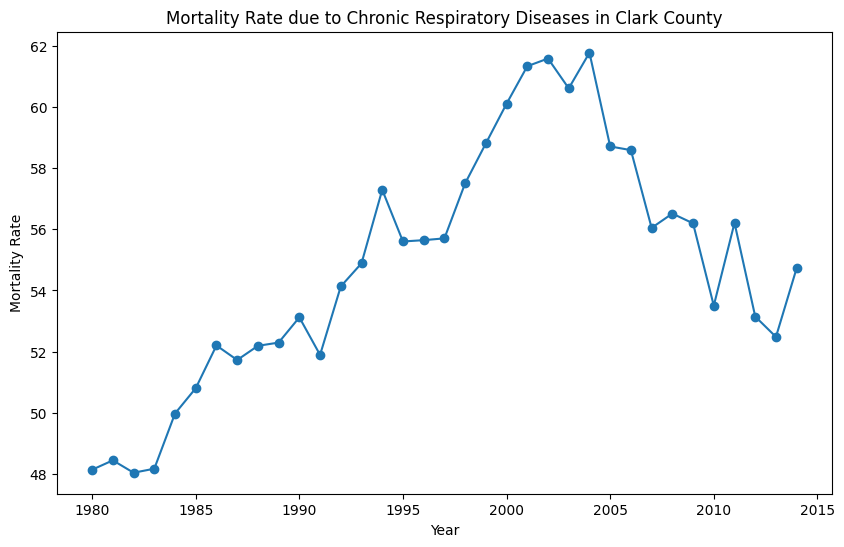

In [6]:
subset = mortality_clark[(mortality_clark["cause_name"] == "Chronic respiratory diseases") 
                         & (mortality_clark["sex"] == "Both")]

plt.figure(figsize=(10, 6))
plt.plot(subset["year_id"], subset["mx"], marker="o")
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate due to Chronic Respiratory Diseases in Clark County")
plt.show()

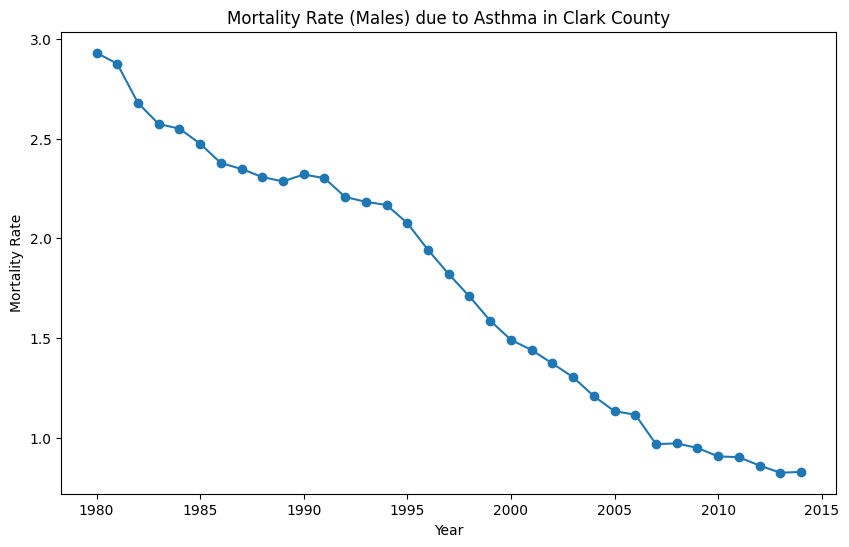

In [7]:
subset = mortality_clark[(mortality_clark["cause_name"] == "Asthma") 
                         & (mortality_clark["sex"] == "Male")]

plt.figure(figsize=(10, 6))
plt.plot(subset["year_id"], subset["mx"], marker="o")
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate (Males) due to Asthma in Clark County")
plt.show()

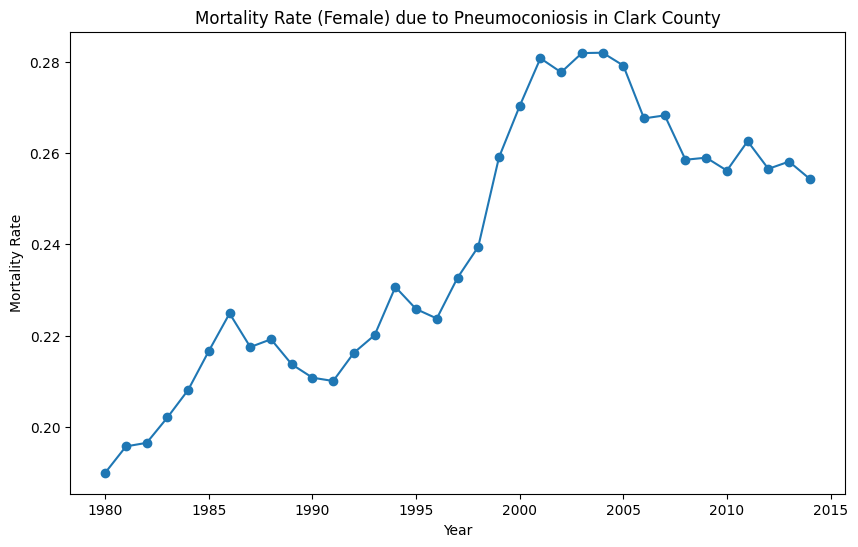

In [8]:
subset = mortality_clark[(mortality_clark["cause_name"] == "Pneumoconiosis") 
                         & (mortality_clark["sex"] == "Female")]

plt.figure(figsize=(10, 6))
plt.plot(subset["year_id"], subset["mx"], marker="o")
plt.xlabel("Year")
plt.ylabel("Mortality Rate")
plt.title("Mortality Rate (Female) due to Pneumoconiosis in Clark County")
plt.show()

## 3 Dataset - Clark County, WA: Unemployment Rate (FRED Economic Data)

In [9]:
unemployment = pd.read_csv("../data/FRED_Unemployment_rate_Clark_County.csv")
unemployment.head()

,DATE,WACLAR1URN
0,1990-01-01,5.0
1,1990-02-01,5.8
2,1990-03-01,5.1
3,1990-04-01,4.8
4,1990-05-01,4.5


In [10]:
# rename columns for better readability
unemployment.rename(columns={"WACLAR1URN": "unemployment_rate"}, inplace=True)

# get year from date
unemployment["DATE"] = pd.to_datetime(unemployment["DATE"])
unemployment["year"] = unemployment["DATE"].dt.year
unemployment.drop("DATE", axis=1, inplace=True)

unemployment.head()

,unemployment_rate,year
0,5.0,1990
1,5.8,1990
2,5.1,1990
3,4.8,1990
4,4.5,1990


group by and get the mean unemployment rate for each year

In [11]:
grouped_unemployment = unemployment.groupby("year")["unemployment_rate"].mean().reset_index()
grouped_unemployment.head()

,year,unemployment_rate
0,1990,4.683333
1,1991,6.158333
2,1992,7.033333
3,1993,5.866667
4,1994,4.591667


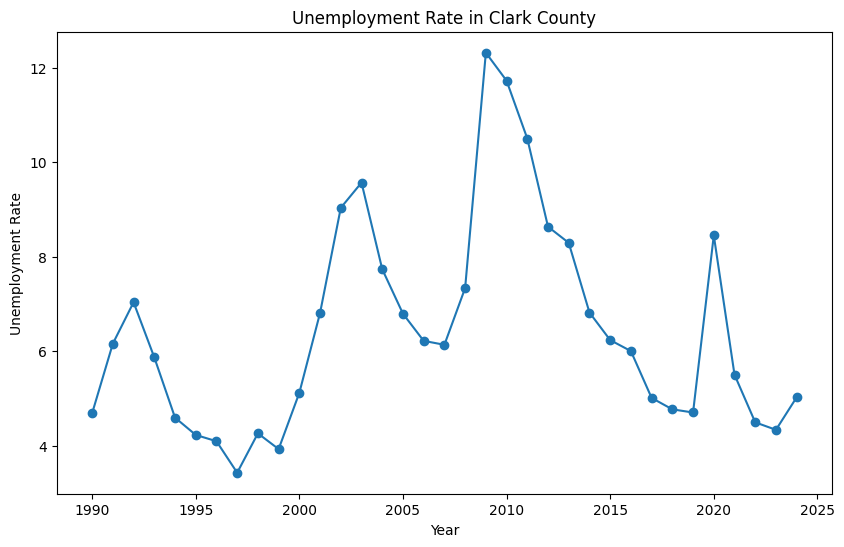

In [12]:
plt.figure(figsize=(10, 6))

plt.plot(grouped_unemployment["year"], grouped_unemployment["unemployment_rate"], marker="o")
plt.xlabel("Year")
plt.ylabel("Unemployment Rate")
plt.title("Unemployment Rate in Clark County")
plt.show()

## 4 Dataset - Clark County, WA: Median Household Income (FRED Economic Data)

In [13]:
poverty = pd.read_csv("../data/FRED_Poverty_Clark_County.csv")
poverty.head()

,DATE,PPU18WA53011A156NCEN
0,1989-01-01,15.5
1,1990-01-01,.
2,1991-01-01,.
3,1992-01-01,.
4,1993-01-01,15.4


In [14]:
# rename columns for better readability
poverty.rename(columns={"PPU18WA53011A156NCEN": "poverty_rate"}, inplace=True)

# handle missing values
poverty["poverty_rate"] = poverty["poverty_rate"].replace('.', np.nan)
poverty = poverty.dropna()
poverty["poverty_rate"] = pd.to_numeric(poverty["poverty_rate"], errors='coerce')

# get year from date
poverty["DATE"] = pd.to_datetime(poverty["DATE"])
poverty["year"] = poverty["DATE"].dt.year
poverty.drop("DATE", axis=1, inplace=True)

poverty.head()

,poverty_rate,year
0,15.5,1989
4,15.4,1993
6,13.0,1995
8,13.5,1997
9,12.2,1998


In [15]:
grouped_poverty = poverty.groupby("year")["poverty_rate"].mean().reset_index()
grouped_poverty.head()

,year,poverty_rate
0,1989,15.5
1,1993,15.4
2,1995,13.0
3,1997,13.5
4,1998,12.2


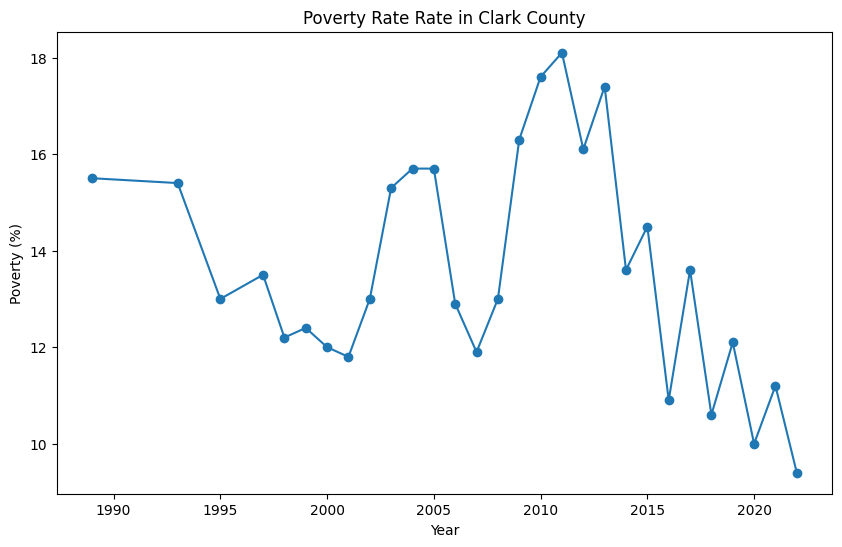

In [16]:
plt.figure(figsize=(10, 6))

plt.plot(grouped_poverty["year"], grouped_poverty["poverty_rate"], marker="o")
plt.xlabel("Year")
plt.ylabel("Poverty (%)")
plt.title("Poverty Rate Rate in Clark County")
plt.show()

## 5 Dataset - Clark County, WA: Premature Deaths (FRED Economic Data)

In [17]:
premature_deaths = pd.read_csv("../data/FRED_Premature_Deaths_Clark_County.csv")
premature_deaths.head()

,DATE,CDC20N2U053011
0,1999-01-01,300.5
1,2000-01-01,314.4
2,2001-01-01,299.1
3,2002-01-01,311.1
4,2003-01-01,298.1


In [18]:
# rename columns for better readability
premature_deaths.rename(columns={"CDC20N2U053011": "death_rate_per_100k"}, inplace=True)

# get year from date
premature_deaths["DATE"] = pd.to_datetime(premature_deaths["DATE"])
premature_deaths["year"] = premature_deaths["DATE"].dt.year
premature_deaths.drop("DATE", axis=1, inplace=True)

premature_deaths.head()

,death_rate_per_100k,year
0,300.5,1999
1,314.4,2000
2,299.1,2001
3,311.1,2002
4,298.1,2003


In [19]:
grouped_premature_deaths = premature_deaths.groupby("year")["death_rate_per_100k"].mean().reset_index()
grouped_premature_deaths.head()

,year,death_rate_per_100k
0,1999,300.5
1,2000,314.4
2,2001,299.1
3,2002,311.1
4,2003,298.1


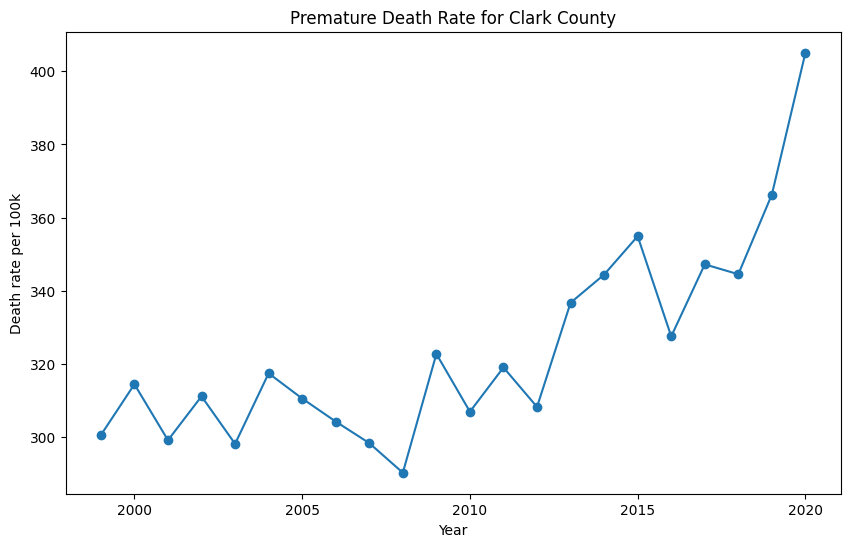

In [20]:
plt.figure(figsize=(10, 6))

plt.plot(grouped_premature_deaths["year"], grouped_premature_deaths["death_rate_per_100k"], marker="o")
plt.xlabel("Year")
plt.ylabel("Death rate per 100k")
plt.title("Premature Death Rate for Clark County")
plt.show()